# Stackoverflow 2020 curvey

### For this data, there are three questions proposed. 

#### Three real-world questions of the following data
1, Do people who start coding early have a higher pay in their career?<br>
2, Do people who start coding early will tend to be a professional developer?<br>
3, Are people with more coding experience paid more?

The reason behind these three questions is that personally I didn't start coding early and I felt really left behind when I first started univeristy. A lot of my peers at the university have lots of coding experience before they come while I have none. Therefore, I would like to investigate the relationip between these variables.

In [32]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
# read in our data
df = pd.read_csv('stack-overflow-developer-survey-2020/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


#### Question 1: Do people who start coding early have a higher pay in their career?

In [34]:
# Gather and access data, slice the dataframe for our first question
df_1 = df[['Age1stCode', 'ConvertedComp']]
df_1.head()

,Age1stCode,ConvertedComp
0,13,NaN
1,19,NaN
2,15,NaN
3,18,NaN
4,16,NaN


In [35]:
# Clean the data
# Drop any missing values
df_1.dropna(subset=['ConvertedComp'], axis=0, inplace=True)
df_1.head()

<ipython-input-35-39b5a087a915>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.dropna(subset=['ConvertedComp'], axis=0, inplace=True)


,Age1stCode,ConvertedComp
7,12,116000.0
9,14,32315.0
10,13,40070.0
11,42,14268.0
12,14,38916.0


In [36]:
# Check work
df_1.isnull().sum()

Age1stCode       85
ConvertedComp     0
dtype: int64

In [37]:
# replace categorical varibale with an integer string
# 4 is reasonable here because 3 and below would be too young to start coding
df_1['Age1stCode'].replace(to_replace='Younger than 5 years', value='4', inplace=True)
df_1['Age1stCode'] = pd.to_numeric(df_1['Age1stCode'], errors='coerce') # convert object type to numerical value
df_1.dtypes

/Users/zhongqi_yue/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-37-9a589e1edb66>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Age1stCode'] = pd.to_numeric(df_1['Age1stCode'], errors='coerce') # convert object type to numerical value


Age1stCode       float64
ConvertedComp    float64
dtype: object

In [38]:
# replace missing values in Age1stCode column with the column mean value
df_1['Age1stCode'].fillna(np.mean(df_1['Age1stCode']), inplace=True)
df_1.isnull().sum()
df_1.dtypes

/Users/zhongqi_yue/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Age1stCode       float64
ConvertedComp    float64
dtype: object

<AxesSubplot:xlabel='Age1stCode', ylabel='ConvertedComp'>

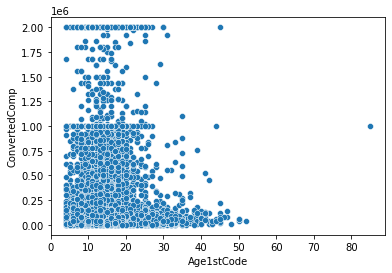

In [39]:
# Visualization of data
# use a scatterplot to see if there are any obviouse relationships
sns.scatterplot(x='Age1stCode', y='ConvertedComp', data=df_1)

#### Question 2: Do people who start coding early will tend to be a professional developer?

In [40]:
# Gather and Access data
# slice the dataframe for our second question
df_2 = df[['Age1stCode', 'MainBranch']]
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age1stCode  57900 non-null  object
 1   MainBranch  64162 non-null  object
dtypes: object(2)
memory usage: 1007.3+ KB


In [41]:
# Clean the data 
# Drop any missing values in MainBranch column and replace some object in Age1stCode column
df_2.dropna(subset=['MainBranch'], axis=0, inplace=True)
df_2['Age1stCode'].replace(to_replace='Younger than 5 years', value='4', inplace=True)
# convert data type and fill in any NaN 
df_2['Age1stCode'] = pd.to_numeric(df_2['Age1stCode'], errors='coerce')
df_2['Age1stCode'].fillna(np.mean(df_2['Age1stCode']), inplace=True)
df_2.isnull().sum()

<ipython-input-41-f735e1f5dc6c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.dropna(subset=['MainBranch'], axis=0, inplace=True)
/Users/zhongqi_yue/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-41-f735e1f5dc6c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2

Age1stCode    0
MainBranch    0
dtype: int64

In [42]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64162 entries, 0 to 64161
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age1stCode  64162 non-null  float64
 1   MainBranch  64162 non-null  object 
dtypes: float64(1), object(1)
memory usage: 1.5+ MB


In [43]:
# find the 25th percentile in Age1stCode column as the standard of "starting coding early"
quantile_25th = df_2['Age1stCode'].quantile(q=0.25,interpolation='linear')
quantile_25th

13.0

In [44]:
# divide dataframe into two, one for people who start early(at the age less than or equal to 13)
df2_less = df_2.loc[df_2.Age1stCode <= quantile_25th]
df2_less.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20171 entries, 0 to 64154
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age1stCode  20171 non-null  float64
 1   MainBranch  20171 non-null  object 
dtypes: float64(1), object(1)
memory usage: 472.8+ KB


In [45]:
# for people who start early(at the age greater than 13)
df2_more = df_2.loc[df_2.Age1stCode > quantile_25th]
df2_more.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43991 entries, 1 to 64161
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age1stCode  43991 non-null  float64
 1   MainBranch  43991 non-null  object 
dtypes: float64(1), object(1)
memory usage: 1.0+ MB


<AxesSubplot:ylabel='None'>

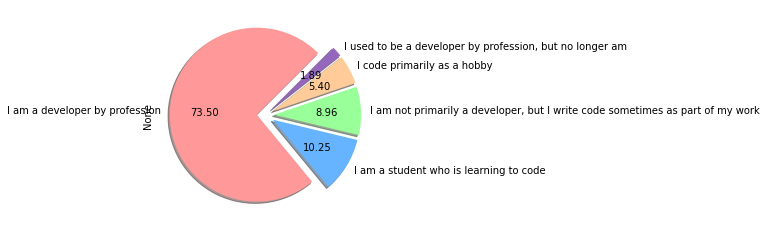

In [46]:
# Visualization of data
# use groupby method to graph a pie chart for people who start early ans see what they do now
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#9467bd']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
df2_less.groupby('MainBranch').size().plot(kind='pie', autopct='%.2f', colors=colors, explode=explode, shadow=True, startangle=45)

<AxesSubplot:ylabel='None'>

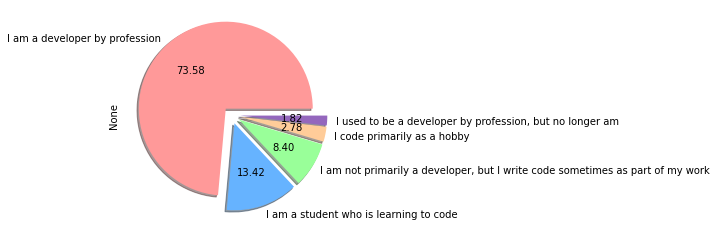

In [47]:
# use groupby method to graph a pie chart for people who do not start early ans see what they do now
df2_more.groupby('MainBranch').size().plot(kind='pie', autopct='%.2f', colors=colors, explode=explode, shadow=True)

#### Question 3: Are people with more coding experience paid more?

In [48]:
# Gather and Access data
# slice the date for our third question
df_3 = df[['YearsCode', 'ConvertedComp']]
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YearsCode      57684 non-null  object 
 1   ConvertedComp  34756 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1007.3+ KB


In [49]:
# Clean the data
# drop any NaN in ConvertedComp column
df_3.dropna(subset=['ConvertedComp'], axis=0, inplace=True)
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YearsCode      34630 non-null  object 
 1   ConvertedComp  34756 non-null  float64
dtypes: float64(1), object(1)
memory usage: 814.6+ KB


<ipython-input-49-40820082f133>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3.dropna(subset=['ConvertedComp'], axis=0, inplace=True)


In [50]:
# check all unique values in this column
df_3['YearsCode'].value_counts()

10                    3047
8                     2080
6                     2015
7                     2009
5                     1987
15                    1907
20                    1877
12                    1698
9                     1534
4                     1282
11                    1190
13                    1089
14                    1083
3                      979
25                     952
16                     921
18                     846
17                     809
30                     747
22                     606
2                      511
19                     502
23                     457
21                     425
35                     423
40                     350
24                     336
26                     294
28                     248
27                     246
32                     224
1                      203
38                     198
37                     184
36                     167
34                     163
33                     157
2

In [51]:
# replace the two categorical object
# We choose 1 because our smallest unit in this survey is year. For people who only code less than a year, we can assume 1.
# For people who code for over 50 years, we replace with 50, under the consideration that 50 is already half of people's life
df_3['YearsCode'].replace(to_replace={'Less than 1 year': '1', 'More than 50 years': '50'}, inplace=True)
df_3['YearsCode'].value_counts()

/Users/zhongqi_yue/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


10    3047
8     2080
6     2015
7     2009
5     1987
15    1907
20    1877
12    1698
9     1534
4     1282
11    1190
13    1089
14    1083
3      979
25     952
16     921
18     846
17     809
30     747
22     606
2      511
19     502
23     457
21     425
35     423
40     350
24     336
26     294
1      285
28     248
27     246
32     224
38     198
37     184
36     167
34     163
33     157
29     133
31     120
39     105
42      78
50      72
41      67
43      60
45      56
44      45
46      22
48      17
47      17
49      10
Name: YearsCode, dtype: int64

In [52]:
# convert categorical variabes to numerical ones
df_3['YearsCode'] = pd.to_numeric(df_3['YearsCode'], errors='coerce')
df_3['YearsCode'].fillna(np.mean(df_3['YearsCode']), inplace=True)
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YearsCode      34756 non-null  float64
 1   ConvertedComp  34756 non-null  float64
dtypes: float64(2)
memory usage: 814.6 KB


<ipython-input-52-0cd7076e4af3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['YearsCode'] = pd.to_numeric(df_3['YearsCode'], errors='coerce')
/Users/zhongqi_yue/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<AxesSubplot:xlabel='YearsCode', ylabel='ConvertedComp'>

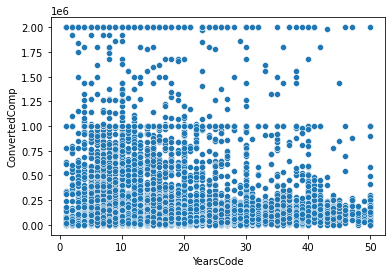

In [53]:
# Visualization of data
# plot a scatterplot to see if there is obvious trend
sns.scatterplot(x='YearsCode', y='ConvertedComp', data=df_3)

### Some conclusions from the above analysis

1, There are no obvious relationship between person's first coding age and their salary now. However, from the scatter plot, we can see that people who start coding after 30 will have a lower income generally.<br>
2, People can be a professional developer even if they do not start early.<br>
3, More coding experience does not necessarily mean more salary.<br>

One more conclusion(not for the purpose of these three questions):<br>
Most people are paid less than 1.00 and there are some people who are paid at around 2.00. Less people are paid in the range between 1.00 to 2.00. Hence, only few people can achive really high salary and there is not much "middle" salary.